<a href="https://colab.research.google.com/github/ssrbazpur/Data-Science/blob/master/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install plotly

In [0]:
import pandas_datareader as pdr 
import plotly.express as px
import matplotlib.pyplot as plt

In [0]:
#Reading the Apple Stock
df = pdr.DataReader( "AAPL","yahoo")

In [4]:
df.shape

(2537, 6)

In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.601469
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.647457
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.223597
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.175119
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.349140


In [0]:
#reset the index
df=df.reset_index()

In [11]:
fig = px.line(df, x="Date", y="Close", title='Stock Close Price')
fig.show()

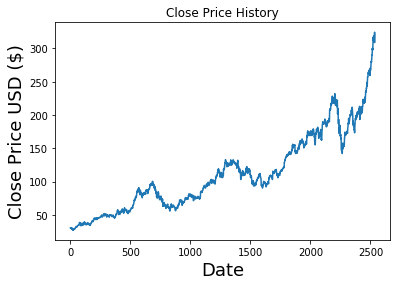

In [12]:
#matplotlib same graphy
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [16]:
close_price=df.filter(["Close"])
type(close_price)

pandas.core.frame.DataFrame

In [17]:
series=df["Close"]
type(series)

pandas.core.series.Series

In [19]:
#Dataframe to numpy
data=close_price.values
type(data)

numpy.ndarray

In [22]:
data

array([[ 30.5728569 ],
       [ 30.62571335],
       [ 30.13857079],
       ...,
       [324.33999634],
       [323.86999512],
       [309.51000977]])

In [0]:
from sklearn.preprocessing import MinMaxScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [0]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_values=scaler.fit_transform(close_price)


In [28]:
scaled_values

array([[0.01056617],
       [0.0107442 ],
       [0.00910346],
       ...,
       [1.        ],
       [0.99841699],
       [0.95005129]])

In [30]:
len(scaled_values)

2537

In [0]:
import math

In [0]:
#split into train and test
train_data=scaled_values[0:math.ceil(len(scaled_values)*0.8),:]

In [48]:
len(train_data)

2030

In [49]:
train_data

array([[0.01056617],
       [0.0107442 ],
       [0.00910346],
       ...,
       [0.5038805 ],
       [0.49438252],
       [0.48390776]])

In [0]:
x_train=[]
y_train=[]
#2 months of data in 1 d array and there predicted result in y_train
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [66]:
import numpy as np
a1=np.array([[1],[2]])
a1[0:1,:]

array([[1]])

In [71]:
type(x_train)

list

In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [73]:
x_train[0]

array([1.05661736e-02, 1.07441988e-02, 9.10345937e-03, 8.91581083e-03,
       9.58943117e-03, 8.68966897e-03, 7.53970658e-03, 8.94949249e-03,
       8.36248213e-03, 6.67843771e-03, 1.10617623e-02, 9.46913953e-03,
       7.70810846e-03, 2.74258517e-03, 5.30233346e-03, 6.68324938e-03,
       7.61669323e-03, 3.48356240e-03, 4.81166563e-06, 1.28949427e-03,
       1.83319963e-03, 3.45469241e-03, 0.00000000e+00, 1.64073943e-03,
       9.95989088e-04, 1.99198460e-03, 1.47714923e-03, 3.18524555e-03,
       4.00802110e-03, 5.46111200e-03, 5.05213327e-03, 5.23497014e-03,
       4.62871312e-03, 4.02726777e-03, 2.41058666e-03, 4.14274774e-03,
       4.78749809e-03, 6.04812236e-03, 8.15077527e-03, 8.08341195e-03,
       8.31436548e-03, 8.97836249e-03, 1.29430850e-02, 1.30056303e-02,
       1.49013880e-02, 1.57770854e-02, 1.60946553e-02, 1.66239257e-02,
       1.52959317e-02, 1.55894369e-02, 1.54306583e-02, 1.56856702e-02,
       1.45308961e-02, 1.57337868e-02, 1.74707532e-02, 1.79567250e-02,
      

In [74]:
type(x_train)

numpy.ndarray

In [0]:
#https://keras.io/layers/recurrent/


# 3D tensor with shape (batch_size, timesteps, input_dim).

# Output shape
# if return_state: a list of tensors. The first tensor is the output. The remaining tensors are the last states, each with shape (batch_size, units). For example, the number of state tensors is 1 (for RNN and GRU) or 2 (for LSTM).
# if return_sequences: 3D tensor with shape (batch_size, timesteps, units).
# else, 2D tensor with shape (batch_size, units).

In [78]:
x_train.shape

(1970, 60, 1)

In [77]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1970, 60, 1)

In [0]:
x_train[0]

In [81]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [82]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [83]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 

test_data=scaled_values[len(train_data)-60:,:]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

NameError: ignored